**Dataset:**
personality type data (Lab 2 - Personality Profile Type.csv)

**Objective:**
classify Personality type as one of the following **using RNNs**. <br>
['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

**Evaluation metric:**
Precision

### Import used libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

In [2]:
df = pd.read_csv("Lab 2 - Personality Profile Type.csv")
df.head(10)

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   
5  INTJ   
6  INFJ   
7  INTJ   
8  INFJ   
9  INTP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...  
2  'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...  
3  'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub,   Long time no see.  Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358...  
4  'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...  
5  '18/37 @.@|||Science  is not perfect. No scientist claims that it is, or that scientific  information will not be revised as we discover new things.  Rational  thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi and are quick to put her as INFP. I agree that she has no Ne. I see her as an ISFP. Compare her to Haku (definite INFP). She is flat through most of Naruto.. but I don't...|||Lets get this party star...  
6  'No, I can't draw on my own nails (haha). Those were done by professionals on my nails. And yes, those are all gel.  You mean those you posted were done by yourself on your own nails? Awesome!|||Probably the Electronic Screen Syndrome. With the advent of technology and social media, we all suffer from overstimulation on a daily basis. I'm gu

### Data splitting

In [3]:
X=df['posts']
y=df["type"]

In [37]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training data into training and validation sets with stratified sampling
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (6246,)
Validation data shape: (694,)
Test data shape: (1735,)


### EDA on training data

- check NaNs

In [38]:
# EDA on training data
print("Training data information:")
print(X_train.info())

# Check for NaNs
print("\nNaNs in training data:")
print(X_train.isnull().sum())


Training data information:
<class 'pandas.core.series.Series'>
Int64Index: 6246 entries, 7094 to 6839
Series name: posts
Non-Null Count  Dtype 
--------------  ----- 
6246 non-null   object
dtypes: object(1)
memory usage: 97.6+ KB
None

NaNs in training data:
0


- check duplicates

In [39]:
# Check for duplicates
duplicates = X_train[X_train.duplicated()]
print("Number of duplicates in training data:", len(duplicates))


Number of duplicates in training data: 0


- show a representative sample of data texts to find out required preprocessing steps

In [40]:
# Display a representative sample of text data (10%)
sample_texts = df['posts'].sample(frac=0.1, random_state=7)
for text in sample_texts:
    print(text)
    print('-' * 50)

'A whore on crystal meth or ecstasy has probably literally drowned in cum.|||Far above our heads are the icy heights that contain all reason.|||What the fuck are you talking about? The word offensive is not in an INTP's vocabulary.|||Who's your daddy?|||I don't forgive because I don't even get mad. I just build contempt to the point where I start to see you as just something that needs to die.|||It's just lazy and cliche.|||Does this really impress you? Horrible. It doesn't even make sense.|||First I park my car, then I fuck your bitch.|||Exactly half? There's no way to possibly know that.|||The entire time I'm falling asleep, I'm fixated on the pov porno I'm writing and living out in my mind.|||Jesus fucking Christ you are such a pussy.|||I would've already removed the mask by the time the tape is played and you have no proof it was me. Would you hit me?|||What if I never showed my face to the camera and instead of hijacking the projector, I, while wearing a mask, approach and bribe a

- check dataset balancing

In [41]:
# Check dataset balancing
personality_counts = df['type'].value_counts()
print("Personality type counts:")
print(personality_counts)


Personality type counts:
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


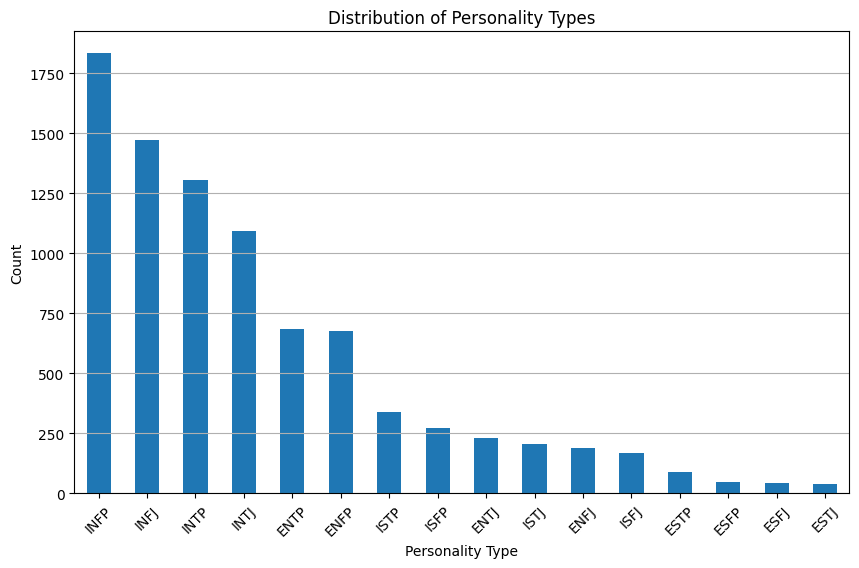

In [42]:
import matplotlib.pyplot as plt

# Check dataset balancing
personality_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
personality_counts.plot(kind='bar')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

### Cleaning and Preprocessing

In [43]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into a single string
    clean_text = ' '.join(lemmatized_tokens)
    
    return clean_text



In [44]:
X_train=X_train.apply(clean_text)

In [45]:
X_test=X_test.apply(clean_text)

In [46]:
X_val=X_val.apply(clean_text)


In [47]:
#['posts'].apply(clean_text)

In [48]:
df['posts'].apply(clean_text)

0       intj moment sportscenter top ten play prankswhat lifechanging experience life repeat todaymay perc experience immerse youthe last thing infj friend posted facebook committing suicide next day rest peace enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set matchprozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternativebasicall...
1       im finding lack post alarmingsex boring position often example girlfriend currently environment creatively use cowgirl missionary isnt enoughgiving new meaning game theoryhello entp grin thats take converse flirting acknowledge presence return word smooth wordplay cheeky grinsthis lack balance hand eye coordinationreal iq test score internet iq test funny score higher like former response thread mention dont believe iq test banishyou know youre entp vanish site year half return f

In [49]:
import numpy as np

# Convert target labels to integer type
label_map = {personality: idx for idx, personality in enumerate(personality_counts.index)}
y_train_int = np.array([label_map[label] for label in y_train])
y_val_int = np.array([label_map[label] for label in y_val])
y_test_int = np.array([label_map[label] for label in y_test])

# Train the model
#history = model.fit(X_train_pad, y_train_int, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val_int))


In [50]:
df['type'].unique()


array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [51]:
len(y_test_int)

1735

**You  are doing Great so far!**

### Modelling

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [53]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [54]:
len(X_train_seq)

6246

In [55]:
def max_text_length(texts):
    max_length = 0
    for text in texts:
        length = len(text.split())
        if length > max_length:
            max_length = length
    return max_length


In [56]:
max_len = max_text_length(X_train)
print("Maximum length of text:", max_len)


Maximum length of text: 950


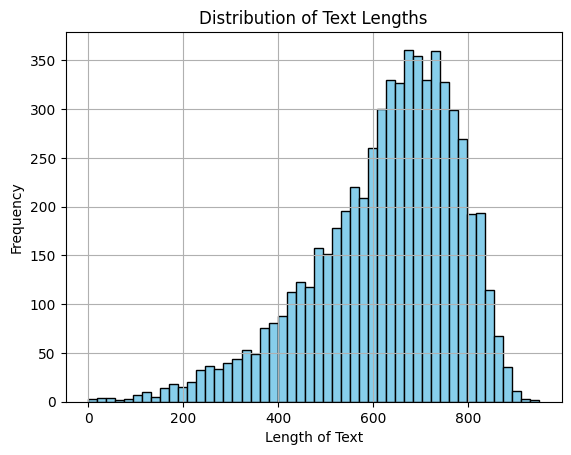

In [57]:
import matplotlib.pyplot as plt

def plot_text_length_distribution(texts):
    lengths = [len(text.split()) for text in texts]
    plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Length of Text')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Assuming 'texts' is a list of text data
plot_text_length_distribution(X_train)


In [58]:
# Pad sequences to ensure uniform length
max_sequence_length = 900 # Adjust as needed based on the maximum length of your text
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

In [59]:
len(X_train_pad[0])

900

In [60]:
# Define the RNN model
embedding_dim = 100  # Dimension of word embeddings
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
rnn_units = 128  # Number of units in the RNN layer

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    SimpleRNN(rnn_units),
    Dense(16, activation='relu'),
    Dense(len(personality_counts), activation='softmax')  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train_pad, y_train_int, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val_int))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_int)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 900, 100)          23514000  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
Total params: 23,545,648
Trainable params: 23,545,648
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 107s 537ms/step - loss: 2.3357 - accuracy: 0.1940 - val_loss: 2.2787 - val_accuracy: 0.2118
Epoch 2/10
196/196 [===

#### Evaluation

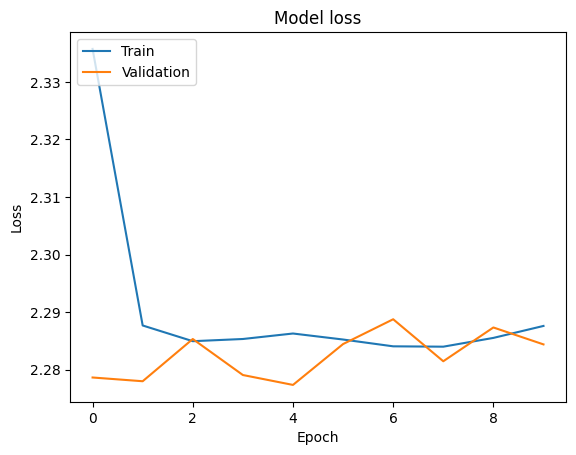

In [61]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Evaluation metric:**
Precision

In [65]:
# Predict class probabilities for the test set
y_pred_probs = model.predict(X_test_pad)

# Get the class with the highest probability for each sample
y_pred = y_pred_probs.argmax(axis=1)

55/55 [==============================] - 4s 65ms/step


In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_int, y_pred)

0.207492795389049

In [70]:
from sklearn.metrics import precision_score

# Calculate precision
precision_score(y_test_int, y_pred, average='weighted')


c:\Users\Abdo Mostafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.04420393661955293

#### Done!